In [21]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


'which' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('merged_df.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# 规范化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 划分数据集
train_data = scaled_data[data.index < '2022-08-13']
test_data = scaled_data[data.index >= '2022-08-13']

# 准备数据集
def create_dataset(dataset, time_step=1, use_label=False):
    feature_columns = [0, 1] if use_label else [1]  # 当使用 'label' 时，选择两列
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), feature_columns]
        X.append(a)
        Y.append(dataset[i + time_step, 1])  # 目标值始终为 'close'
    return np.array(X), np.array(Y)


time_step = 10

# 单特征模型的数据
X_train_single, y_train_single = create_dataset(train_data, time_step, use_label=False)
X_test_single, y_test_single = create_dataset(test_data, time_step, use_label=False)

# 双特征模型的数据
X_train_double, y_train_double = create_dataset(train_data, time_step, use_label=True)
X_test_double, y_test_double = create_dataset(test_data, time_step, use_label=True)

# 查看数据形状
print("Shape of X_train_single:", X_train_single.shape)
print("Shape of X_test_single:", X_test_single.shape)
print("Shape of X_train_double:", X_train_double.shape)
print("Shape of X_test_double:", X_test_double.shape)

# 重塑为 LSTM 输入格式
X_train_single = X_train_single.reshape(X_train_single.shape[0], X_train_single.shape[1], 1)
X_test_single = X_test_single.reshape(X_test_single.shape[0], X_test_single.shape[1], 1)
X_train_double = X_train_double.reshape(X_train_double.shape[0], X_train_double.shape[1], 2)
X_test_double = X_test_double.reshape(X_test_double.shape[0], X_test_double.shape[1], 2)


# 构建和训练模型
def create_and_train_model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    # 创建TensorBoard回调
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
    model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, callbacks=[tensorboard_callback])
    return model



Shape of X_train_single: (543, 10, 1)
Shape of X_test_single: (140, 10, 1)
Shape of X_train_double: (543, 10, 2)
Shape of X_test_double: (140, 10, 2)


In [12]:
# 训练两个模型
model_single = create_and_train_model(X_train_single, y_train_single)

Epoch 1/200
17/17 [==============================] - 7s 11ms/step - loss: 0.0756
Epoch 2/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 3/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0072
Epoch 4/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 5/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 6/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 7/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 8/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 9/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 10/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 11/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 12/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 13/200
17/17 [=====

In [18]:
!tensorboard --logdir=logs


'tensorboard' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [14]:
model_double = create_and_train_model(X_train_double, y_train_double)

Epoch 1/200
17/17 [==============================] - 5s 12ms/step - loss: 0.0809
Epoch 2/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0136
Epoch 3/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 4/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 5/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 6/200
17/17 [==============================] - 0s 14ms/step - loss: 0.0042
Epoch 7/200
17/17 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 8/200
17/17 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 9/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 10/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 11/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 12/200
17/17 [==============================] - 0s 13ms/step - loss: 0.0037
Epoch 13/200
17/17 [=====

5/5 [==============================] - 1s 5ms/step


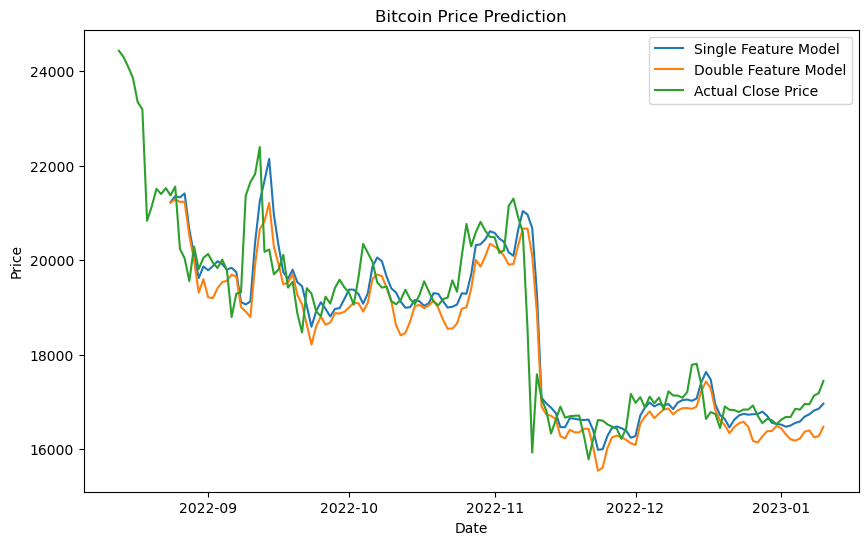

In [15]:
# 进行预测
def predict_and_inverse(model, X_test):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(np.column_stack((np.zeros(prediction.shape), prediction)))
    return prediction[:, 1]

prediction_single = predict_and_inverse(model_single, X_test_single)
prediction_double = predict_and_inverse(model_double, X_test_double)

# 绘制比较图
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(prediction_single):], prediction_single, label='Single Feature Model')
plt.plot(data.index[len(data) - len(prediction_double):], prediction_double, label='Double Feature Model')

# 根据您的数据结构调整此部分
# 如果是单特征模型，使用索引 0；如果是双特征模型，使用索引 1
index_for_actual = 0 if scaled_data.shape[1] == 1 else 1
plt.plot(data.index[len(data) - len(test_data):], scaler.inverse_transform(test_data)[:, index_for_actual], label='Actual Close Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error

# 获取测试数据的实际 close 值
# 根据您的数据结构调整此部分
index_for_actual = 0 if scaled_data.shape[1] == 1 else 1
actual_close = scaler.inverse_transform(test_data)[:, index_for_actual]

# 计算实际 close 值和模型预测值之间的 MSE
mse_single = mean_squared_error(actual_close[len(actual_close) - len(prediction_single):], prediction_single)
mse_double = mean_squared_error(actual_close[len(actual_close) - len(prediction_double):], prediction_double)

print("MSE for Single Feature Model:", mse_single)
print("MSE for Double Feature Model:", mse_double)

# 计算实际 close 值和模型预测值之间的 RMSE
rmse_single = np.sqrt(mean_squared_error(actual_close[len(actual_close) - len(prediction_single):], prediction_single))
rmse_double = np.sqrt(mean_squared_error(actual_close[len(actual_close) - len(prediction_double):], prediction_double))

print("RMSE for Single Feature Model:", rmse_single)
print("RMSE for Double Feature Model:", rmse_double)

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    # 避免除以零
    non_zero_actual = actual != 0
    return np.mean(np.abs((actual[non_zero_actual] - predicted[non_zero_actual]) / actual[non_zero_actual])) * 100

# 计算单特征和双特征模型的 MAPE
mape_single = calculate_mape(actual_close[len(actual_close) - len(prediction_single):], prediction_single)
mape_double = calculate_mape(actual_close[len(actual_close) - len(prediction_double):], prediction_double)

print("MAPE for Single Feature Model:", mape_single)
print("MAPE for Double Feature Model:", mape_double)


MSE for Single Feature Model: 586786.6200252209
MSE for Double Feature Model: 660790.7740780432
RMSE for Single Feature Model: 766.019986700883
RMSE for Double Feature Model: 812.8903825719942
MAPE for Single Feature Model: 2.4952391109656813
MAPE for Double Feature Model: 3.1167506618317073


# 模型可视化

In [11]:
#install pydot and graphviz
#pip install pydot
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 651.7 kB/s eta 0:00:00a 0:00:01


In [7]:
model_single.save('single_feature_model.keras')
model_double.save('double_feature_model.keras')

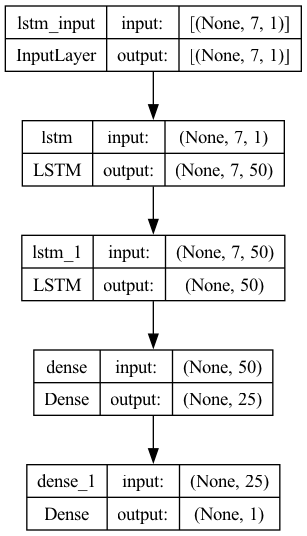

In [13]:
import tensorflow.keras.models as models
from tensorflow.keras.utils import plot_model


plot_model(model_single, to_file='model_structure.png', show_shapes=True)